# Practical Work for noobies

**Don't forget to submit your work by the end of the week**

__Firstname__ :...  
__Lastname__ :...  

Enjoy :)

In [224]:
import skimage.io as skio
from skimage import measure
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.filters import gaussian, sobel, threshold_otsu
from scipy.ndimage import binary_closing, binary_fill_holes, label, gaussian_filter
import scipy
from skimage.morphology import disk
import numpy as np
from sklearn.cluster import KMeans

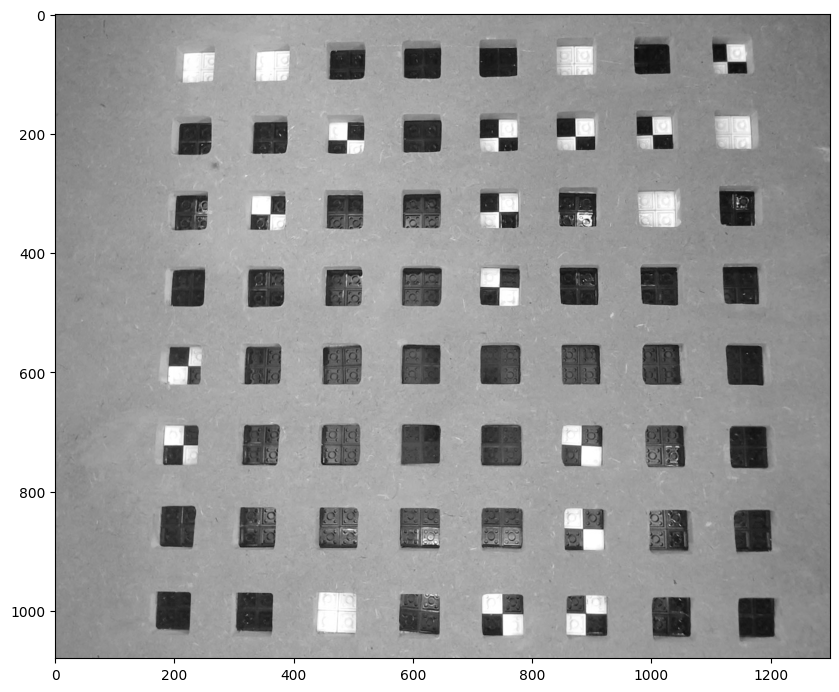

In [183]:
img = skio.imread('data/2.jpg')
img_gray = rgb2gray(img[:,300:1600])

plt.figure(figsize=(10, 10))
plt.imshow(img_gray, cmap='gray')

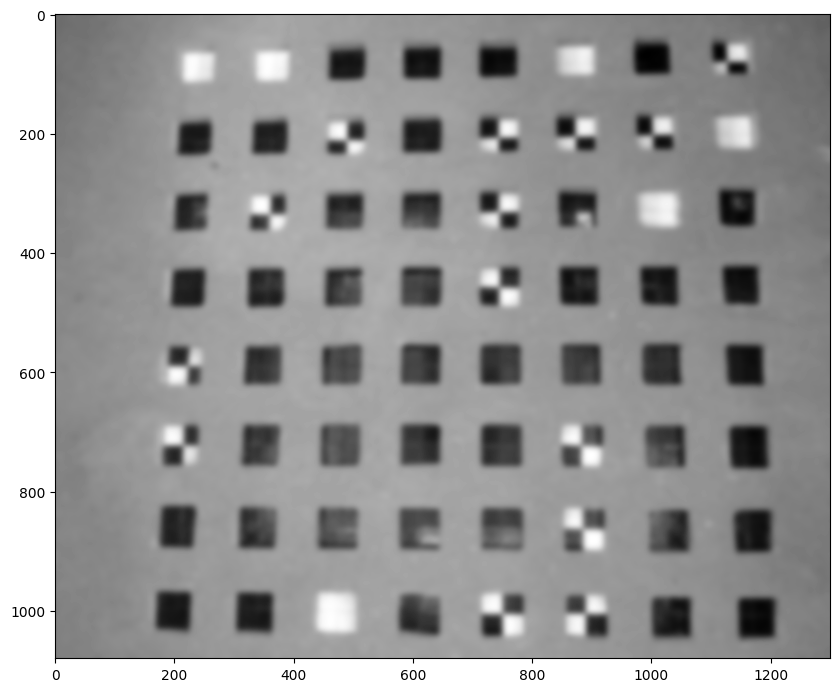

In [184]:
im_blur = gaussian(img_gray, sigma=5)


plt.figure(figsize=(10, 10))
plt.imshow(im_blur, cmap='gray')

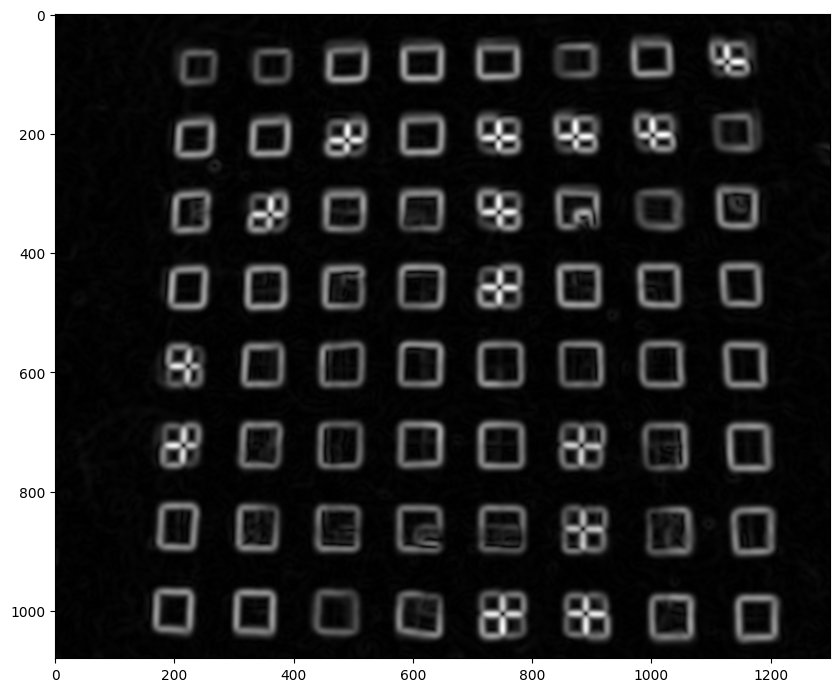

In [185]:
im_sobel = sobel(im_blur)
im_sobel = (im_sobel - im_sobel.min()) / (im_sobel.max() - im_sobel.min())
plt.figure(figsize=(10, 10))
plt.imshow(im_sobel, cmap='gray')

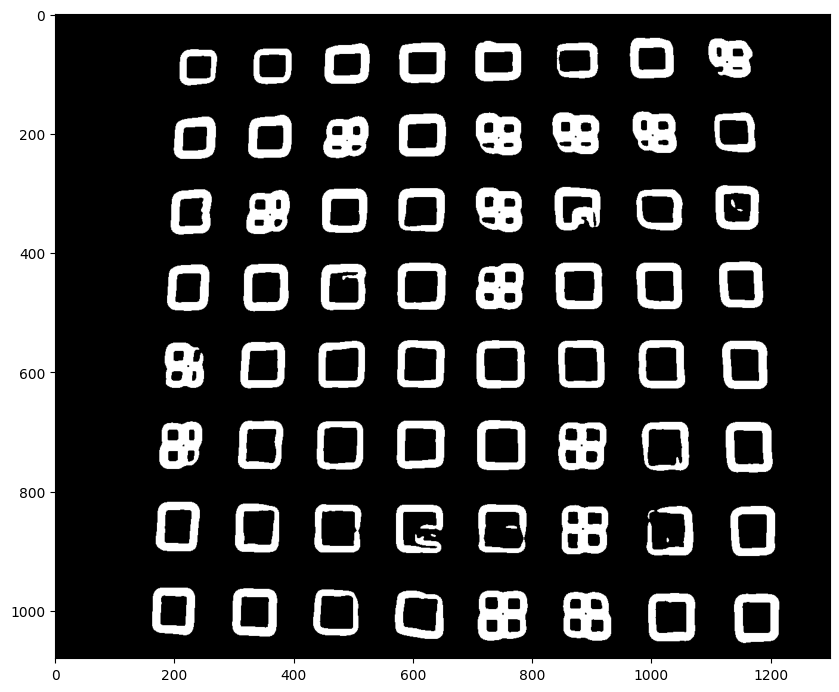

In [186]:
# Appliquer le seuillage avec le seuil optimal
im_thresh = im_sobel > threshold_otsu(im_sobel)
plt.figure(figsize=(10, 10))
plt.imshow(im_thresh, cmap='gray')

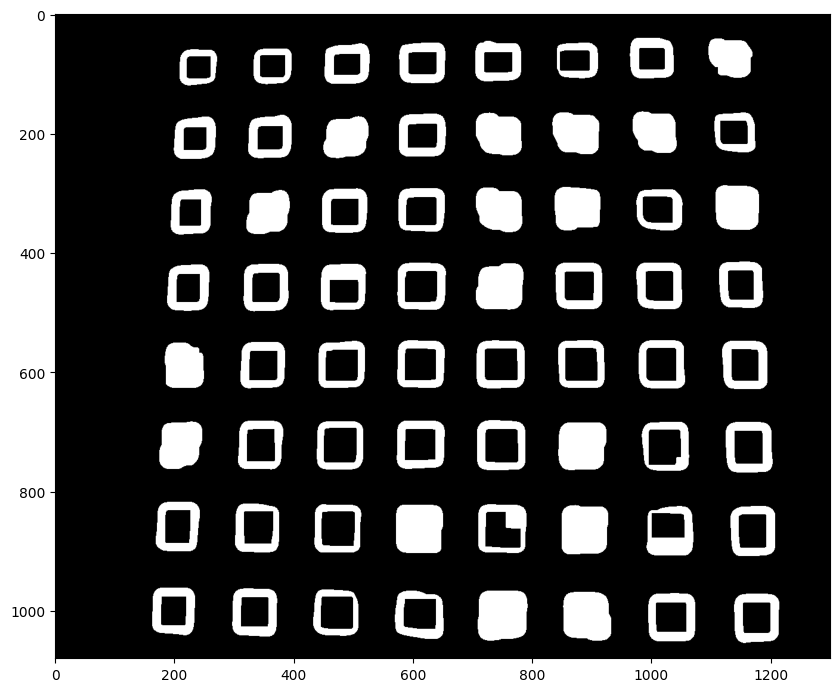

In [187]:
# Appliquer une fermeture morphologique avec un élément structurant (kernel) en forme de disque
disk_size = 10  # Taille du disque

square_size = 30  # Taille du carré (3x3 dans cet exemple)
# Créer un élément structurant en forme de carré en utilisant un tableau de numpy rempli de 1
square_structuring_element = np.ones((square_size, square_size), dtype=np.uint8)
im_closed = binary_closing(im_thresh, structure=square_structuring_element)
plt.figure(figsize=(10, 10))
plt.imshow(im_closed, cmap='gray')

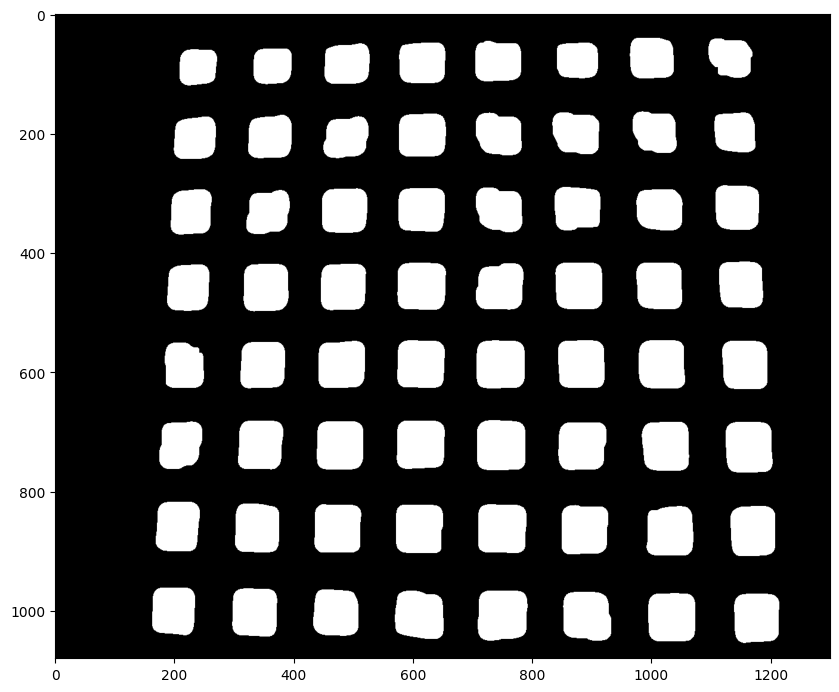

In [188]:
im_filled = binary_fill_holes(im_closed)
plt.figure(figsize=(10, 10))
plt.imshow(im_filled, cmap='gray')

num_feature:  64


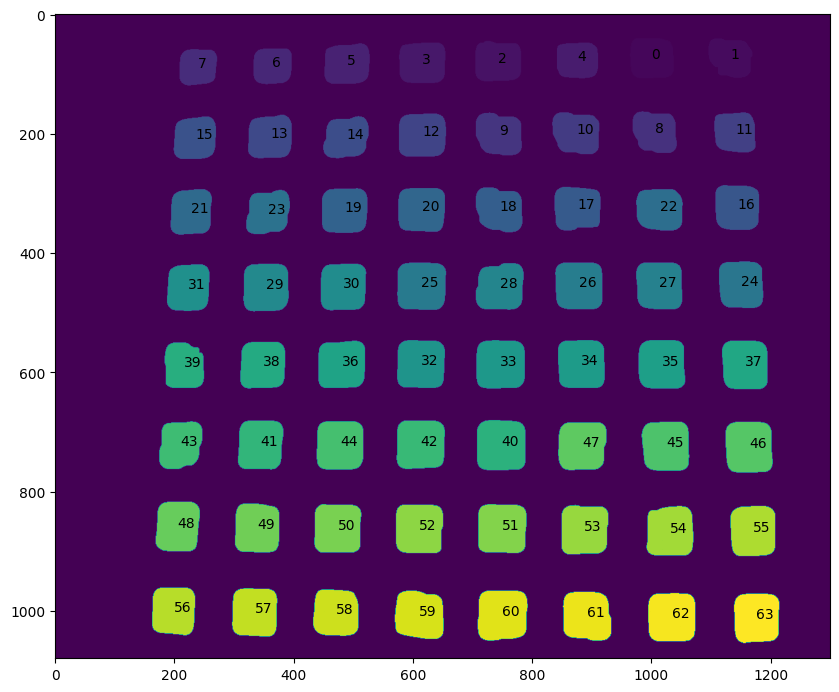

In [189]:
im_labeled, num_feature = label(im_filled)
print('num_feature: ', num_feature)

region_props = measure.regionprops(im_labeled)
plt.figure(figsize=(10, 10))
plt.imshow(im_labeled)
for i in range(num_feature):
    plt.text(region_props[i].centroid[1],region_props[i].centroid[0], s=i)


In [190]:
np.unique(im_labeled)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

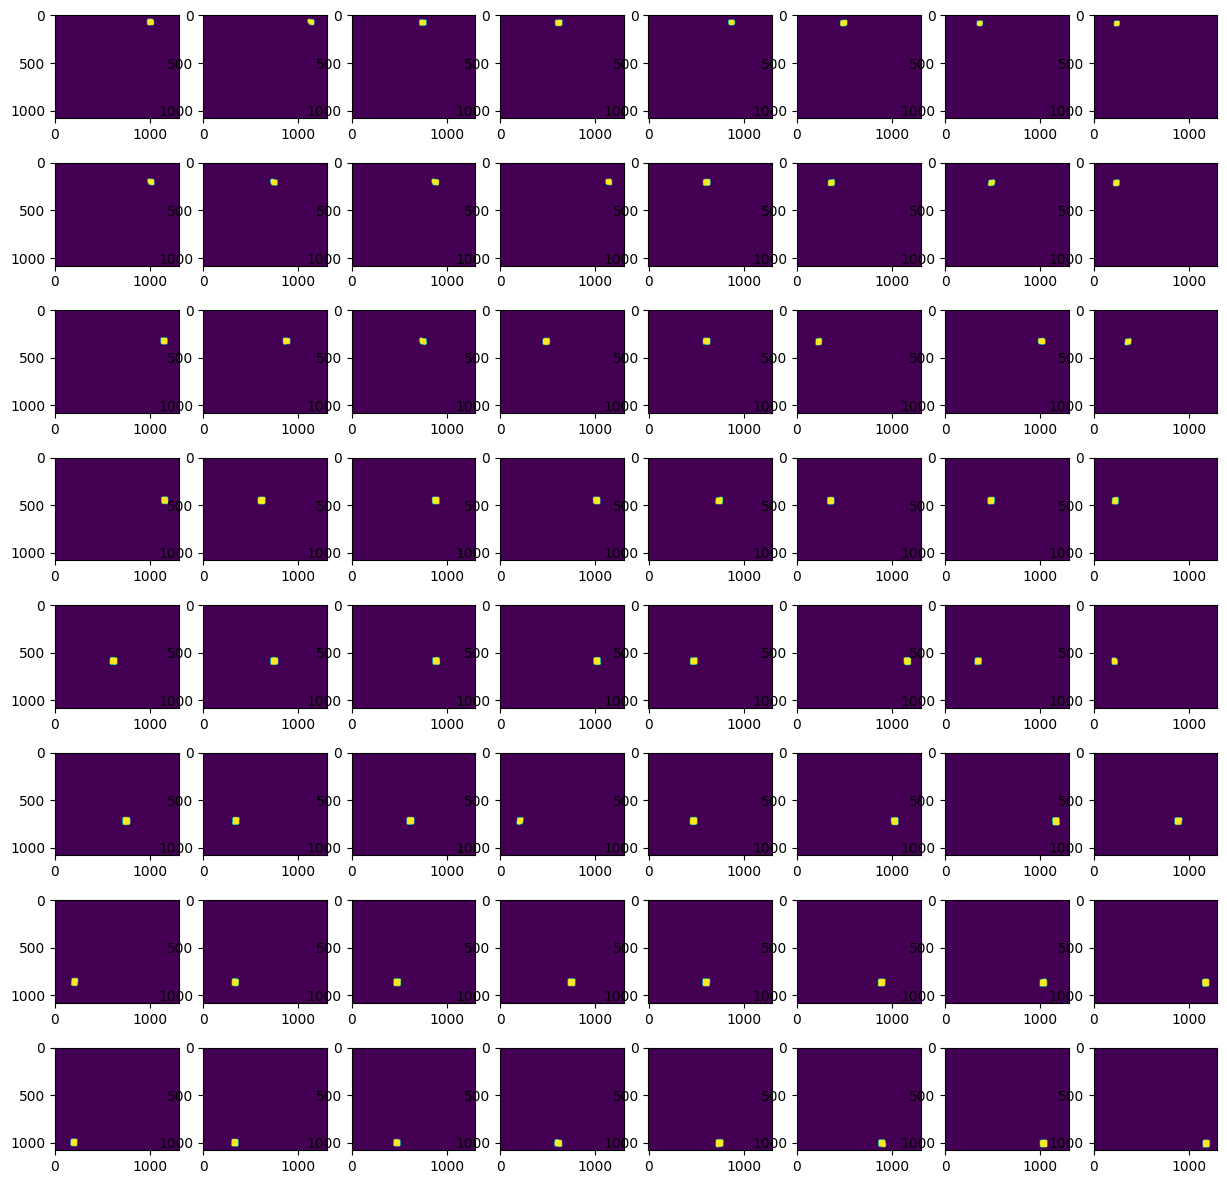

In [191]:
im_region = im_labeled==2
fig, axes = plt.subplots(8, 8, figsize=(15,15))
ax = axes.ravel()
for i in range(len(np.unique(im_labeled))-1):
    axes[i//8,i%8].imshow(im_labeled==i+1)

plt.show()

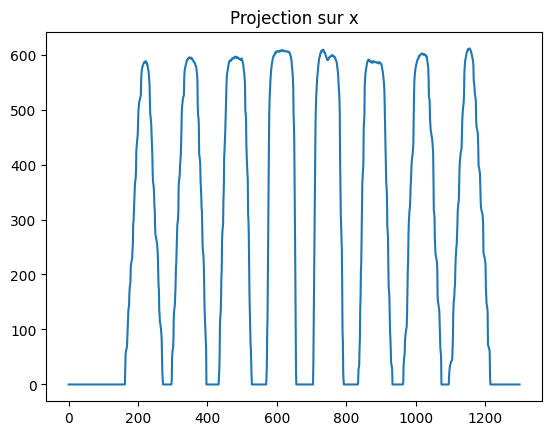

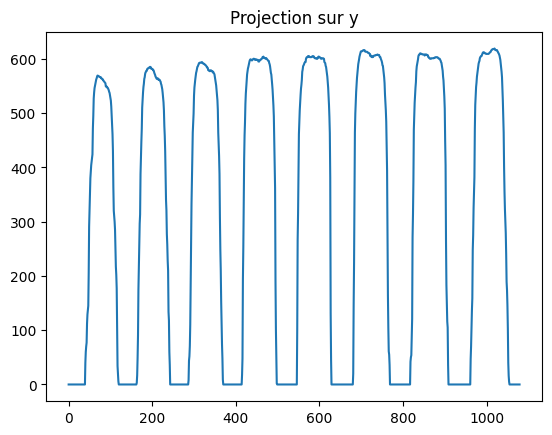

In [192]:
proj_x = np.sum(im_filled, axis=0)
proj_y = np.sum(im_filled, axis=1)

plt.plot(proj_x)
plt.title("Projection sur x")
plt.show()

plt.plot(proj_y)
plt.title("Projection sur y")
plt.show()


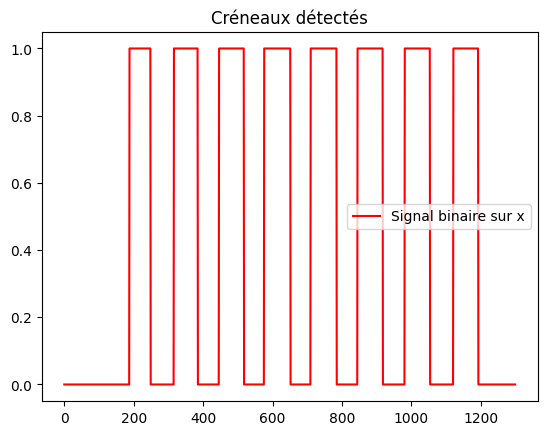

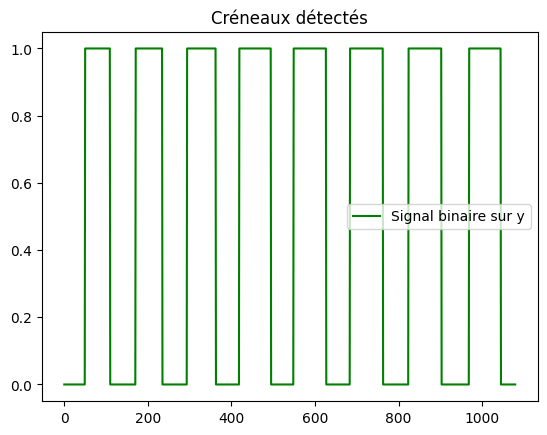

In [193]:
seuil_x = max(proj_x)/2  # Seuil de détection des créneaux
seuil_y = max(proj_y)/2
signal_binaire_x = (proj_x > seuil_x).astype(int)
signal_binaire_y = (proj_y > seuil_x).astype(int)

labels_x, num_labels_x = scipy.ndimage.label(signal_binaire_x)
labels_y, num_labels_y = scipy.ndimage.label(signal_binaire_y)

plt.plot(signal_binaire_x, 'r', label="Signal binaire sur x")
plt.title("Créneaux détectés")
plt.legend()
plt.show()

plt.plot(signal_binaire_y, 'g', label="Signal binaire sur y")
plt.title("Créneaux détectés")
plt.legend()
plt.show()

In [194]:
centres_creneaux_x = [np.mean(np.where(labels_x==i)) for i in range(1,num_labels_x+1)]
centres_creneaux_y = [np.mean(np.where(labels_y==i)) for i in range(1,num_labels_y+1)]


[(73.58102852203976, 1000.4822817631806), (72.30738016738523, 1133.036520415927), (79.3184982071293, 742.4484286015609), (81.43023018944795, 615.9325728254227), (77.10284810126582, 876.0226793248945), (83.48078583765113, 489.5984455958549), (86.5650441218332, 364.4494733845716), (88.27615679339817, 239.13409961685824), (197.30333716915996, 1006.4029919447642), (201.13071474565356, 744.4855119124276), (199.0627118644068, 874.1900423728814), (197.97305171158047, 1140.5401796552562), (202.79379115710253, 615.5700846660395), (205.95817570407735, 360.5441361916772), (206.80027328626736, 488.196993851059), (207.84864744019674, 234.58618376928237), (323.8535333596526, 1143.9397947098303), (325.19446104801756, 875.3239689181112), (327.4441038217862, 745.3218884120172), (329.1626893939394, 485.2123106060606), (327.5110404191617, 614.6064745508982), (331.5403792883017, 227.93394417217132), (327.4114713216958, 1014.0648379052369), (332.26052867383515, 357.1449372759857), (453.3824250424288, 1150.

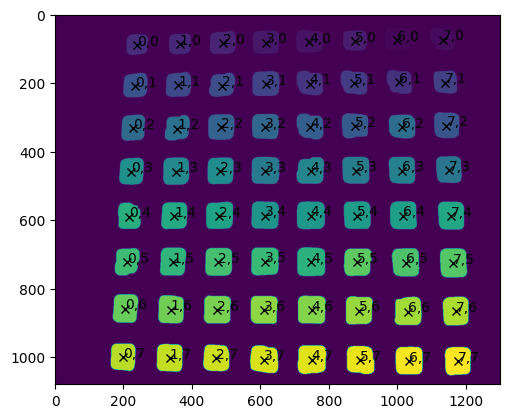

[(6, 0),
 (7, 0),
 (4, 0),
 (3, 0),
 (5, 0),
 (2, 0),
 (1, 0),
 (0, 0),
 (6, 1),
 (4, 1),
 (5, 1),
 (7, 1),
 (3, 1),
 (1, 1),
 (2, 1),
 (0, 1),
 (7, 2),
 (5, 2),
 (4, 2),
 (2, 2),
 (3, 2),
 (0, 2),
 (6, 2),
 (1, 2),
 (7, 3),
 (3, 3),
 (5, 3),
 (6, 3),
 (4, 3),
 (1, 3),
 (2, 3),
 (0, 3),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (2, 4),
 (7, 4),
 (1, 4),
 (0, 4),
 (4, 5),
 (1, 5),
 (3, 5),
 (0, 5),
 (2, 5),
 (6, 5),
 (7, 5),
 (5, 5),
 (0, 6),
 (1, 6),
 (2, 6),
 (4, 6),
 (3, 6),
 (5, 6),
 (6, 6),
 (7, 6),
 (0, 7),
 (1, 7),
 (2, 7),
 (3, 7),
 (4, 7),
 (5, 7),
 (6, 7),
 (7, 7)]

In [195]:
region_props = measure.regionprops(im_labeled)
centroids = [region_props[i].centroid for i in range(len(region_props))]
print(centroids)

def index_plus_proche_valeur(liste, valeur_cible):
    # Calculer la distance absolue entre chaque élément de la liste et la valeur cible
    distances = [abs(x - valeur_cible) for x in liste]
    # Trouver l'indice de la valeur la plus proche
    index_plus_proche = np.argmin(distances)
    return index_plus_proche

more_close_x = [index_plus_proche_valeur(centres_creneaux_x, centroids[i][1]) for i in range(len(centroids))]
more_close_y = [index_plus_proche_valeur(centres_creneaux_y, centroids[i][0]) for i in range(len(centroids))]

label_index = []
plt.imshow(im_labeled)
for i in range(len(centroids)):
    label_index.append((more_close_x[i],more_close_y[i]))
    plt.plot(centroids[i][1],centroids[i][0],"kx")
    plt.text(centroids[i][1],centroids[i][0], str(more_close_x[i])+","+str(more_close_y[i]) )
plt.show()
label_index

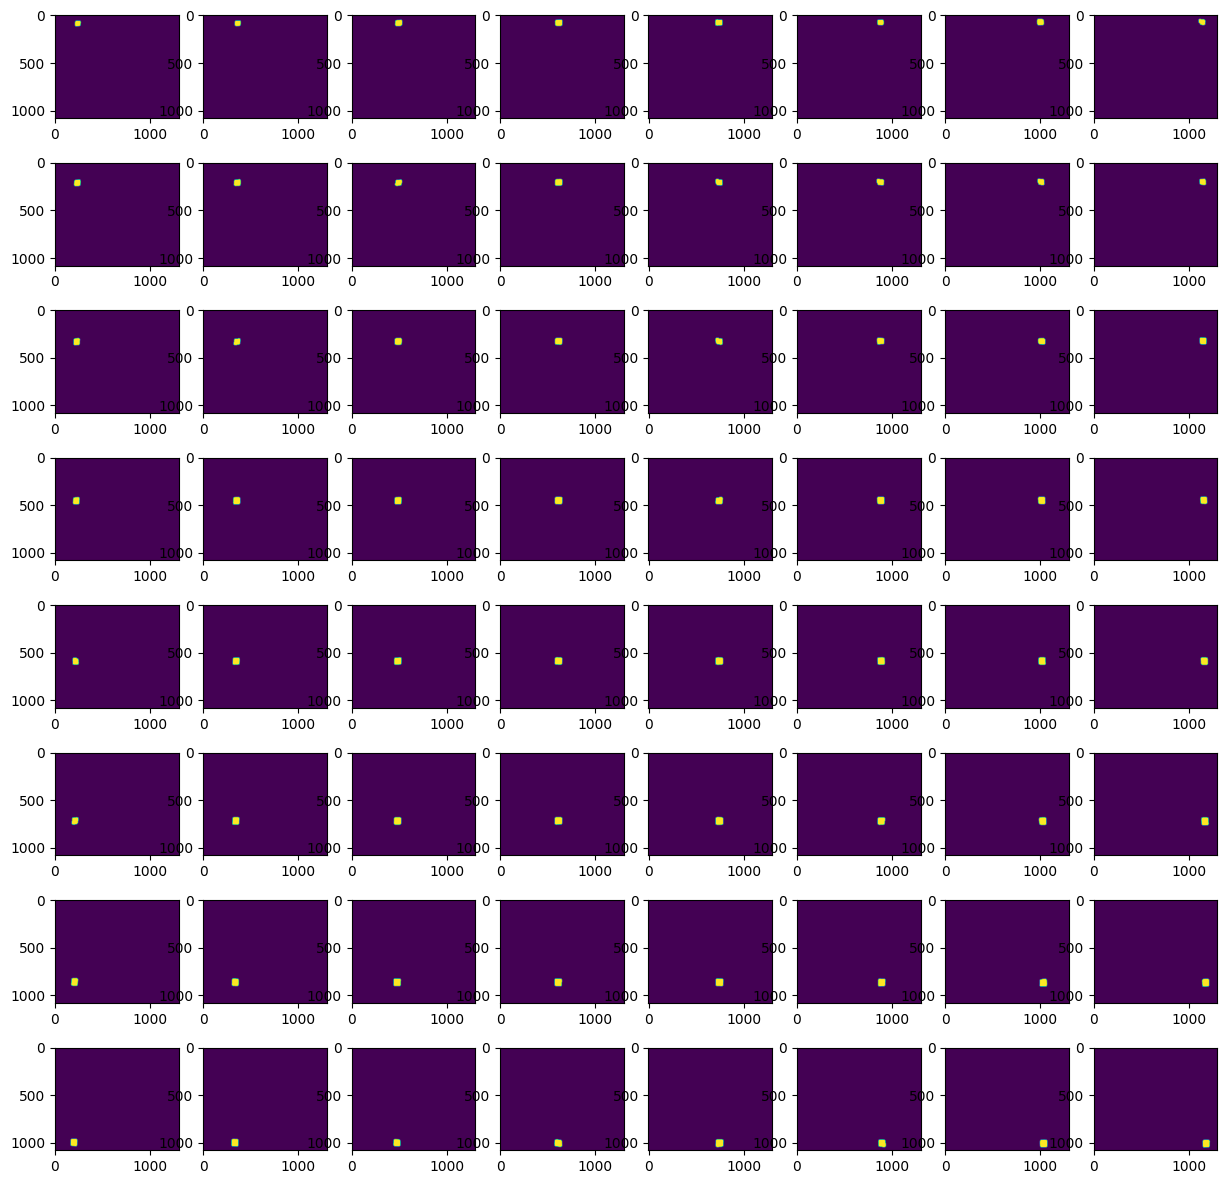

In [196]:
matrix_label = np.zeros((8,8))
for i in range(len(label_index)):
    matrix_label[label_index[i]] = i


fig, axes = plt.subplots(8, 8, figsize=(15,15))
ax = axes.ravel()
for i in range(8):
    for j in range(8):
        axes[i,j].imshow(im_labeled==matrix_label[j,i]+1)

plt.show()


In [215]:
matrix_label = matrix_label.astype(int)
matrix_label

array([[ 7, 15, 21, 31, 39, 43, 48, 56],
       [ 6, 13, 23, 29, 38, 41, 49, 57],
       [ 5, 14, 19, 30, 36, 44, 50, 58],
       [ 3, 12, 20, 25, 32, 42, 52, 59],
       [ 2,  9, 18, 28, 33, 40, 51, 60],
       [ 4, 10, 17, 26, 34, 47, 53, 61],
       [ 0,  8, 22, 27, 35, 45, 54, 62],
       [ 1, 11, 16, 24, 37, 46, 55, 63]])

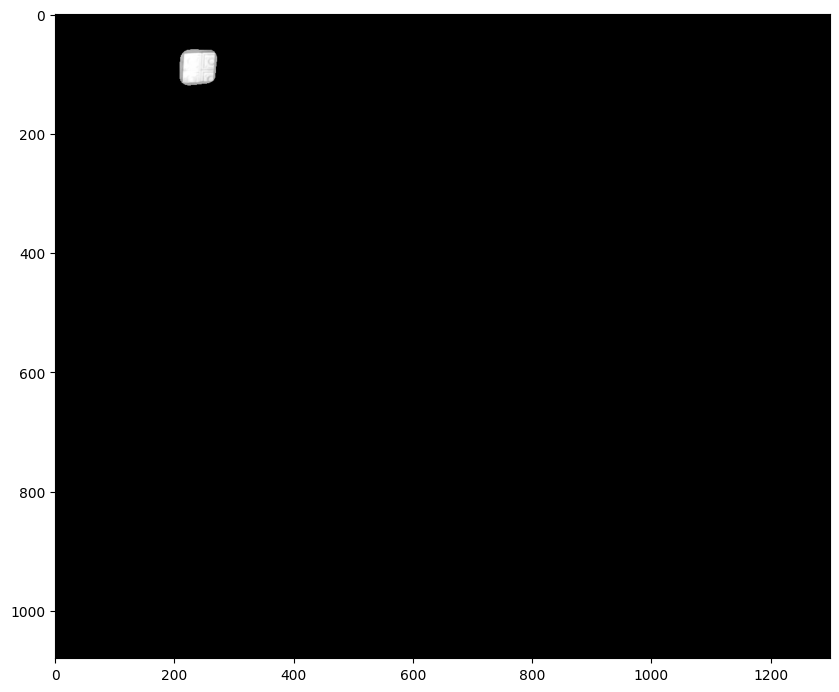

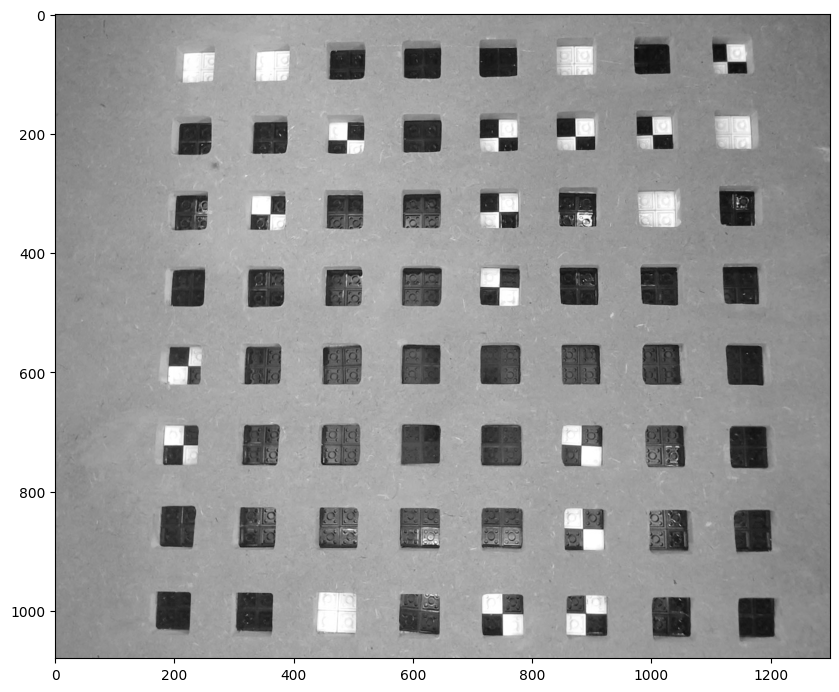

In [216]:
case = img_gray * (im_labeled==8)
plt.figure(figsize=(10, 10))
plt.imshow(case, cmap='gray')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(img_gray, cmap='gray')
plt.show()

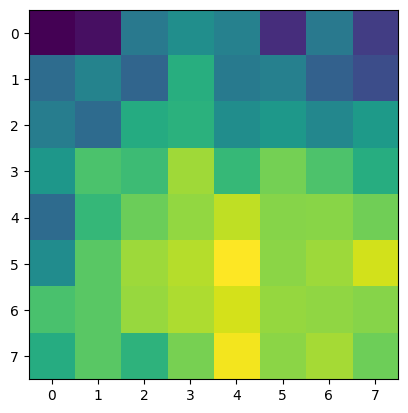

In [217]:
mat_color = np.zeros((8,8))

for i in range(8):
    for j in range(8):
        case = img_gray * (im_labeled==matrix_label[j,i]+1)
        mat_color[i,j] = np.mean(case != 0)

plt.imshow(mat_color)
        

In [218]:
sigma = 20

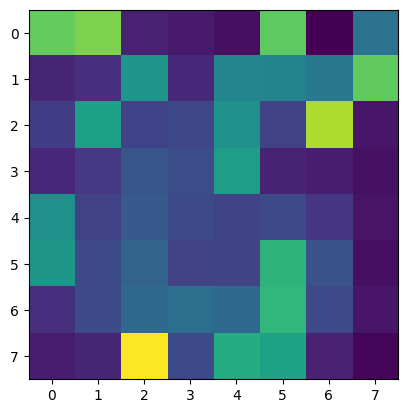

In [221]:
for i in range(8):
    for j in range(8):
        # Coordonnées du point d'intérêt (exemple : (y, x))
        point_interet = (round(region_props[matrix_label[j,i]].centroid[0]),round(region_props[matrix_label[j,i]].centroid[1]))
        case = img_gray * (im_labeled==matrix_label[j,i]+1)
        # Créer un masque gaussien 2D
        masque_gaussien = np.zeros_like(case, dtype=float)
        masque_gaussien[point_interet] = 1  # Définir le centre du masque à 1.0
        masque_gaussien = gaussian_filter(masque_gaussien, sigma=sigma)
        # Normaliser le masque gaussien pour qu'il ait des valeurs entre 0 et 1
        masque_gaussien = masque_gaussien / masque_gaussien.max()
        mat_color[i,j] = np.mean(masque_gaussien*case)

plt.imshow(mat_color)

In [229]:
# Redimensionnez la matrice en une seule ligne
flat_mat = mat_color.flatten()

# Appliquez K-means clustering en 1D avec 3 clusters (groupes)
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(flat_mat.reshape(-1, 1))

# Redimensionnez les labels pour correspondre à la forme d'origine de la matrice
labels = labels.reshape(mat_color.shape)

# Maintenant, "labels" contient les labels associés à chaque case de la matrice.
print(labels)

[[2 2 1 1 1 2 1 0]
 [1 1 0 1 0 0 0 2]
 [1 0 1 1 0 1 2 1]
 [1 1 1 1 0 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 1 0 1 1 2 1 1]
 [1 1 0 0 0 2 1 1]
 [1 1 2 1 2 0 1 1]]


c:\Users\Léon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


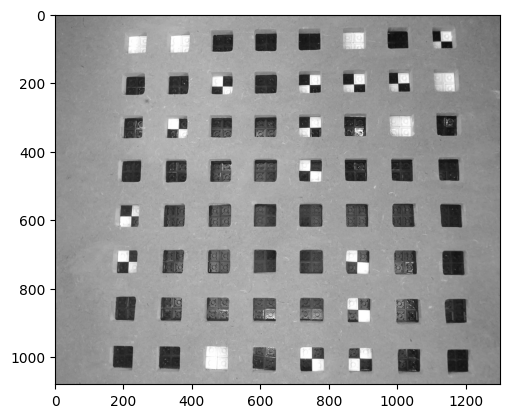

In [230]:
plt.imshow(img_gray, cmap='gray')